# SciPy Tutorial

Most examples in this notebook were taken from this [SciPy in Python Tutorial](https://www.guru99.com/scipy-tutorial.html) by Steve Campbell and adapted by Benjamín Valdés for TC3006.

SciPy in Python is an open-source library used for solving mathematical, scientific, engineering, and technical problems. It allows users to manipulate the data and visualize the data using a wide range of high-level Python commands. SciPy is built on the Python NumPy extention.

## Why use SciPy
- SciPy contains varieties of sub packages which help to solve the most common issue related to Scientific Computation.
- SciPy package in Python is the most used Scientific library only second to GNU Scientific Library for C/C++ or Matlab’s.
- Easy to use and understand as well as fast computational power.
- It can operate on an array of NumPy library.
- SciPy module in Python is a fully-featured version of Linear Algebra (Numpy contains only a few features).
- Most new Data Science features are available in Scipy rather than Numpy.

SciPy is organized into subpackages covering different scientific computing domains:

- `cluster`: Clustering algorithms
- `constants`: Physical and mathematical constants
- `fftpack`: Fast Fourier Transform routines
- `integrate`: Integration and ordinary differential equation solvers
- `interpolate`: Interpolation and smoothing splines
- `io`: Input and Output
- `linalg`: Linear algebra
- `ndimage`: N-dimensional image processing
- `odr`: Orthogonal distance regression
- `optimize`: Optimization and root-finding routines
- `signal`: Signal processing
- `sparse`: Sparse matrices and associated routines
- `spatial`: Spatial data structures and algorithms
- `special`: Special functions
- `stats`: Statistical distributions and functions

SciPy sub-packages need to be imported separately, for example:

In [1]:
from scipy import special, ndimage   # Same for other modules
import numpy as np

Remember you can use the `help()` function to quickly check the available functions in each module.

In [2]:
help(ndimage)

Help on package scipy.ndimage in scipy:

NAME
    scipy.ndimage

DESCRIPTION
    Multidimensional image processing (:mod:`scipy.ndimage`)

    .. currentmodule:: scipy.ndimage

    This package contains various functions for multidimensional image
    processing.


    Filters

    .. autosummary::
       :toctree: generated/

       convolve - Multidimensional convolution
       convolve1d - 1-D convolution along the given axis
       correlate - Multidimensional correlation
       correlate1d - 1-D correlation along the given axis
       gaussian_filter
       gaussian_filter1d
       gaussian_gradient_magnitude
       gaussian_laplace
       generic_filter - Multidimensional filter using a given function
       generic_filter1d - 1-D generic filter along the given axis
       generic_gradient_magnitude
       generic_laplace
       laplace - N-D Laplace filter based on approximate second derivatives
       maximum_filter
       maximum_filter1d
       median_filter - Calculates a mu

Next we'll discuss some sample functions from some sample modules.

### Special

The main feature of the `scipy.special` package is the definition of numerous special functions of mathematical physics. Available functions include cubic root, exponential, log sum exponential, lambert, permutation and combinations, gamma, bessel, hypergeometric, kelvin, beta, parabolic cylinder, relative error exponential, etc. Most of these functions can take array arguments and return array results following the same broadcasting rules as other math functions in NumPy.

Cubic Root function finds the cube root of values.


In [3]:
cb = special.cbrt([[27, 64],[1, 125]])

print(cb)

[[3. 4.]
 [1. 5.]]


Exponential function computes the 10**x element-wise.

In [4]:
exp = special.exp10([[1,10],[2,3]]) 
print(exp)

[[1.e+01 1.e+10]
 [1.e+02 1.e+03]]


Combination function calculates the total number of combinations given N elements taken k at a time.



In [5]:
# Find combinations of 5, 2 values using comb(N, k)
com_without_repetition = special.comb(5, 2)
print(com_without_repetition)

com_with_repetition = special.comb(5, 2, repetition=True)
print(com_with_repetition)

10.0
15.0


Permutation function calculates the total number of possible permutations of N elements taken k at a time.

In [6]:
per = special.perm(5, 2) # Find permutation of 5, 2 using perm (N, k)
print(per)

20.0


### Linalg
Collection of routines for lineal algebra calculations. All of these linear algebra routines expect an object that can be converted into a 2-D array. The output of these routines is also a 2-D array.

The determinant of a square matrix ***A*** is often denoted ***|A|*** and is a quantity often used in linear algebra.

In [7]:
from scipy import linalg

two_d_array = np.array([[4,5], [3,2]])
linalg.det(two_d_array)

-7.0

Getting the inverse matrix (the inverse of a matrix ***A*** is the matrix ***B***, such that ***AB=I***, where ***I*** is the identity matrix)

In [8]:
linalg.inv(two_d_array)

array([[-0.28571429,  0.71428571],
       [ 0.42857143, -0.57142857]])

In [9]:
two_d_array.dot(linalg.inv(two_d_array)) # result should be I

array([[ 1.00000000e+00, -2.22044605e-16],
       [ 1.11022302e-16,  1.00000000e+00]])

Solving linear systems of equations is straightforward using the scipy command `linalg.solve`. This command expects an input matrix and a right-hand side vector. The solution vector is then computed.

For example given the linear system:
\begin{matrix}
x + 2y = 5
\\ 
3x + 4y = 6
\end{matrix}

In [10]:
A = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])
np.linalg.solve(A, b) 

array([[-4. ],
       [ 4.5]])

The eigenvalue-eigenvector problem is one of the most commonly employed linear algebra operations. In one popular form, the eigenvalue-eigenvector problem is to find for some square matrix **A** scalars λ and corresponding vectors **v**, such that 
\begin{matrix} Av=\lambda v\end{matrix}


In [11]:
A = np.array([[1, 2], [3, 4]])
la, v = linalg.eig(A)
print(la)   # eigenvalues
print(v)    # eigenvectors

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### NDImage

Image processing and analysis are generally seen as operations on 2-D arrays of values. There are, however, a number of fields where images of higher dimensionality must be analyzed. Good examples of these are medical imaging and biological imaging. numpy is suited very well for this type of applications due to its inherent multidimensional nature. The scipy.ndimage packages provides a number of general image processing and analysis functions that are designed to operate with arrays of arbitrary dimensionality. SciPy Image Processing provides Geometrics transformation (rotate, crop, flip), image filtering (sharp and de nosing), display image, image segmentation, classification and features extraction.

/var/folders/wg/0ry_2kxj1cjg6v6gw1kzvv_40000gn/T/ipykernel_13321/2723348584.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  thief = misc.face()


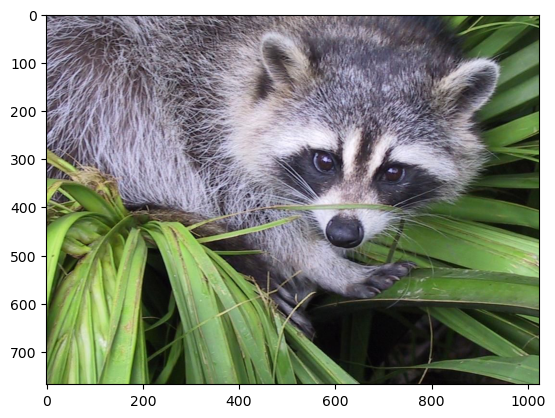

In [12]:
from scipy import misc
from matplotlib import pyplot as plt
#get face image of panda from misc package
thief = misc.face()
#plot or show image of face
plt.imshow(thief)

Image manipulation can be accomplished through simply array manipulations.

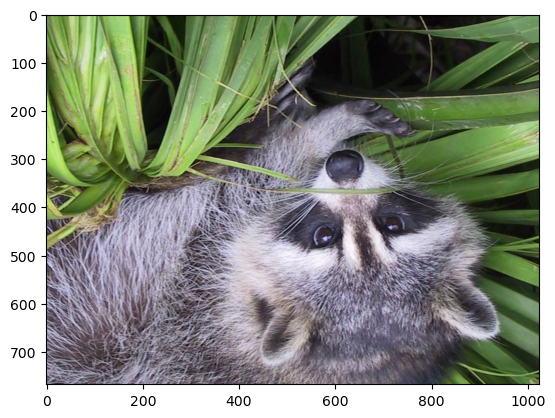

In [13]:
flip_down = np.flipud(thief) # notice this is a numpy function
plt.imshow(flip_down)

NDImage however includes functions specifically developed for multi-dimension image manipulation. For example, we can rotate and zoom an image.

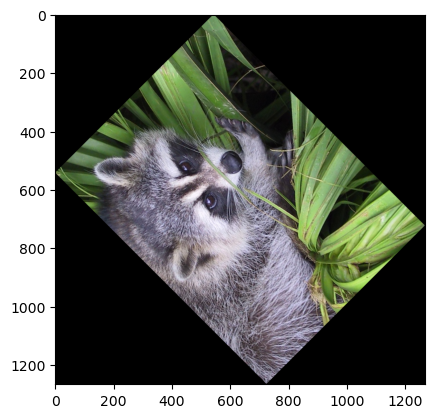

In [14]:
thief_rotate = ndimage.rotate(thief, 135)
plt.imshow(thief_rotate)

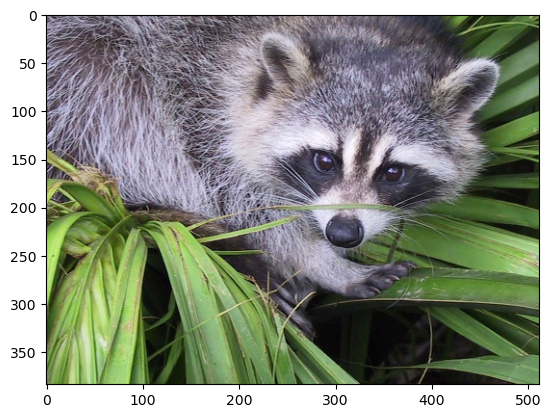

In [15]:
thief_zoomed = ndimage.zoom(thief, [0.5,0.5,1])
plt.imshow(thief_zoomed)

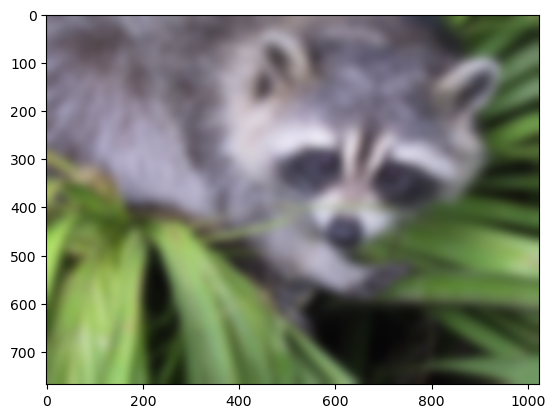

In [16]:
thief_blur = ndimage.gaussian_filter(thief, (10,10,0)) # applying filter along first 2 dimensions
plt.imshow(thief_blur)

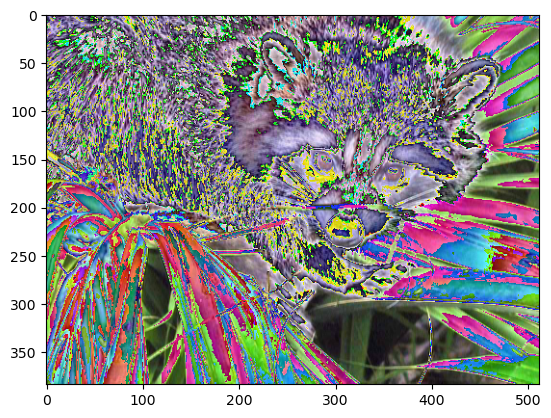

In [17]:
filter = np.array([[0,1,0],[0,1,0],[0,1,0]])
thief_filter = ndimage.convolve(thief_zoomed, filter[:,:,np.newaxis])
plt.imshow(thief_filter)

### Numeric Integration
When we integrate any function where analytically integrate is not possible, we need to turn for numerical integration. SciPy provides functionality to integrate function with numerical integration. For example, for:
\begin{matrix}\int_{a}^{b}f(x)dx\end{matrix}

In [18]:
from scipy import integrate
# take f(x) function as f
f = lambda x : x**2
#single integration with a = 0 & b = 1  
integration = integrate.quad(f, 0 , 1)
print(integration)

(0.3333333333333333, 3.700743415417188e-15)


The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.


The mechanics for double and triple integration have been wrapped up into the functions dblquad and tplquad. These functions take the function to integrate and four, or six arguments, respectively. The limits of all inner integrals need to be defined as functions. For instance, given:
\begin{matrix}\int_{0}^{\frac{2}{4}}\int_{0}^{\sqrt{1-2y^2}}64xydx\end{matrix}

In [19]:
from math import sqrt
# set  fuction f(x)
f = lambda x, y : 64 *x*y
# lower limit of second integral
p = lambda x : 0
# upper limit of first integral
q = lambda y : sqrt(1 - 2*y**2)
# perform double integration
integration = integrate.dblquad(f , 0 , 2/4,  p, q)
print(integration)

(3.0, 9.657432734515774e-14)


This is just a small sample of all SciPy has to offer. Check the full documentation here: https://docs.scipy.org/doc/scipy/getting_started.html